In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

The three reactions to be simulated:

Polystyrene -> Styrene

Polystyrene -> Toluene

Polystyrene -> Ethylbenzene (Benzene)

Brian Lejeune/Prof. West

In [2]:
#Polystyrene Properties

PS_MW = 311600
PS_Polydisperity = 2.39
PS_Density = 1030 #kg/m^3
PS_HeatVal = 49 #MJ/kg

#Source Paper Reactor Properties

Rctr_Pressure = 10^(-1) #Pa
Rctr_TempLow = 613 #K
Rctr_TempHigh = 663 #K
Rctr_HeatRate1 = 3.33E-2
Rctr_HeatRate2 = 8.03E-2
Rctr_HeatRate3 = 1.67E-1

Rctr_Ht = 0.34 #m
Rctr_Hc = 0.205 #m
Rctr_gam = 28
Rctr_Dc = 0.123 #m
Rctr_Di = 0.02 #m
Rctr_Do = 0.01 #m

#Our Reactor Properties
Pyrocycle_T = 723.15 #K

#Kinetic Properties

# From microreactor
PS_Ea = 83 #kJ/mol
PS_ko = 1.82E4 #s^-1

# From the spouted bed reactor
PS_Ea = 123 #kJ/mol
PS_ko = 1.27e7 # s^-1


Sty_Ea = 123 #kJ/mol
Sty_ko = 5.08E7 #s^-1
Sty_mass = 104.15 # g/mol

Met_Ea = 126 #kJ/mol
Met_ko = 2.1E7 #s^-1
Met_mass = 16.04 # g/mol

Ben_Ea = 123 #kJ/mol
Ben_ko = 1.47E7 #s^-1
Ben_mass = 78.11 # g/mol

Tol_Ea = 122 #kJ/mol
Tol_ko = 1.19E7 #s^-1
Tol_mass = 92.14 # g/mol

#Constants
R = 8.314E-3 #kJ/K*mol

In [3]:
#Reaction Rate Calculations for Individual Products

def PSReaction(PS):
    k = PS_ko * math.exp(-1 * PS_Ea/(R * Pyrocycle_T))
    return k * PS

def StyReaction(PS):
    k = Sty_ko * math.exp(-1 * Sty_Ea/(R * Pyrocycle_T))
    return k * PS

def MetReaction(PS):
    k = Met_ko * math.exp(-1 * Met_Ea/(R * Pyrocycle_T))
    return k * PS

def BenReaction(PS):
    k = Ben_ko * math.exp(-1 * Ben_Ea/(R * Pyrocycle_T))
    return k * PS

def TolReaction(PS):
    k = Tol_ko * math.exp(-1 * Tol_Ea/(R * Pyrocycle_T))
    return k * PS

In [4]:
T = Pyrocycle_T
Sty_ko * math.exp(-1*Sty_Ea/(R*T))

0.06622089665137218

In [5]:
StyReaction(1)

0.06622089665137218

In [6]:
BenReaction(1)

0.0191623460782514

In [7]:
#Reaction Kinetics for Overall Reaction

def TotalReaction(C_array, t):
    PS = C_array[0]
    
    #Establishing Reaction Rates from initial PS feed
    Sty_r = StyReaction(PS)
    #Met_r = MetReaction(PS)
    Ben_r = BenReaction(PS)
    Tol_r = TolReaction(PS)
    
    #Obtaining Rate of Generation for each species
    
    # dPSdt = -1 * (Sty_r + Ben_r + Tol_r)
    dPSdt = -1 * PSReaction(PS)
    dStydt = Sty_r
    #dMetdt = Met_r
    dBendt = Ben_r
    dToldt = Tol_r
    
    return [dPSdt, dStydt, dBendt, dToldt]

In [8]:
#Integrating Overall Reaction

W_initial = [10, 0, 0, 0]
t_interval = np.linspace(0, 400)

Y_out_PS = odeint(TotalReaction, W_initial, t_interval)

In [9]:
Y_out_PS

array([[1.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.73589505e+00, 5.05641979e+00, 1.46317659e+00, 1.39881756e+00],
       [7.63158624e+00, 9.47365504e+00, 2.74139230e+00, 2.62080990e+00],
       [6.66687364e+00, 1.33325054e+01, 3.85802815e+00, 3.68832959e+00],
       [5.82411085e+00, 1.67035566e+01, 4.83350949e+00, 4.62090358e+00],
       [5.08788211e+00, 1.96484716e+01, 5.68567976e+00, 5.43559044e+00],
       [4.44472041e+00, 2.22211184e+01, 6.43012677e+00, 6.14729233e+00],
       [3.88286112e+00, 2.44685555e+01, 7.08046784e+00, 6.76902761e+00],
       [3.39202673e+00, 2.64318931e+01, 7.64859899e+00, 7.31216904e+00],
       [2.96323895e+00, 2.81470442e+01, 8.14491239e+00, 7.78665169e+00],
       [2.58865445e+00, 2.96453822e+01, 8.57848658e+00, 8.20115476e+00],
       [2.26142136e+00, 3.09543145e+01, 8.95725244e+00, 8.56326029e+00],
       [1.97555397e+00, 3.20977841e+01, 9.28813831e+00, 8.87959188e+00],
       [1.72582323e+00, 3.30967071e+01, 9.57719674e

Text(0.5, 1.0, 'Plastic Mass vs. Time for Overall Kinetics Reaction')

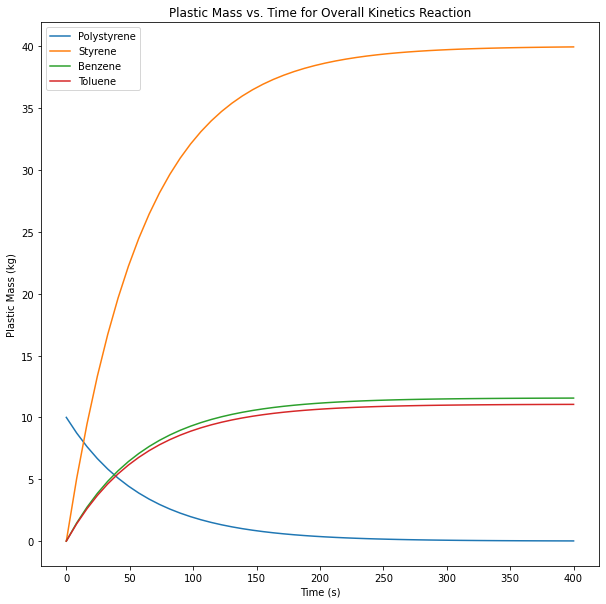

In [10]:
#Plotting the Concentrations of the Reactant and Products
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t_interval, Y_out_PS)
ax.legend(['Polystyrene', 'Styrene', 'Benzene', 'Toluene'])
ax.set_ylabel('Plastic Mass (kg)')
ax.set_xlabel('Time (s)')
ax.set_title('Plastic Mass vs. Time for Overall Kinetics Reaction')